# Assignment 4: Benchmarking Neural Nets with the XOR Problem

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
In this assignment, you will implement your own neural networks to classify non-linear data from the XOR dataset. For references, you may refer to my [lecture 10](https://docs.google.com/presentation/d/1otQfmMomWctLZKI3hHKAA4lLkbXFtagLaQov8gNh4LI/edit?usp=sharing) and [Colab Notebook 10](https://colab.research.google.com/drive/1x5biI3dP5YvvDEI0wapJcSgQNnATDzNe) if you need additional sample codes to help with your assignment. For deliverables, you must write code in Python/Tensorflow and submit **this** Jupyter Notebook file (.ipynb) to earn a total of 100 pts. Note that you must save your Notebook filename under this format: **yourUvaUserId_assignment_4_ann.ipynb**.



In [1]:
# You might want to use the following packages
import numpy as np
import os
%tensorflow_version 2.x
import tensorflow as tf

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from functools import partial

TensorFlow 2.x selected.


---
## 1. THE DATASET AND VISUALIZATION

We will use the non-linear toy data called the XOR dataset. You may use the code snippet below to generate the train/validate/test set. Feel free to change the number of samples, and noise level. To keep the ratio between the sets consistent, please do not change the test_size and random_state parameters.



(720, 2)
(200, 2)
(80, 2)


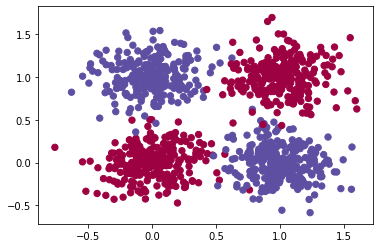

In [0]:
def make_xor(n_points):
    centers = np.array([[0,0],[0,1],[1,0],[1,1]])
    labels = np.array([0,1,1,0])
    data = np.array([]).reshape(-1,3)
    for center, label in zip(centers,labels):
        points = np.random.normal(loc=center,scale=0.2,size=(n_points//4,2))
        points_labels = np.hstack((points,label*np.ones(n_points//4).reshape((-1, 1))))
        data = np.vstack((data,points_labels))
    return (data[:,[0,1]],data[:,2])


X, y = make_xor(1000)
y=y.astype(np.int64)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=49)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size= 0.1, random_state=49) 
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

---
## 2. TRAIN A SIMPLE ANN FOR CLASSIFICATION TASK (20 pts)

Use the standard libarary of Neural Net on the training data, and then test the classifier on the test data. You will create a simple ANN with 3 layers: an Input Layer, a Hidden Layer and an Output Layer. For each layer, you can specify the number of nodes appropriate for the XOR problem. Also, feel free to tune the network as you see fit. You have to report the accuracy of the network on the validation set.

In [0]:
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=[2]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(2, activation="softmax")
])

model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])

history = model.fit(X_train, y_train, epochs=50,
                    validation_data=(X_val, y_val))


Train on 720 samples, validate on 80 samples
Epoch 1/50
720/720 [==============================] - 0s 489us/sample - loss: 0.6968 - sparse_categorical_accuracy: 0.4764 - val_loss: 0.7003 - val_sparse_categorical_accuracy: 0.3625
Epoch 2/50
720/720 [==============================] - 0s 70us/sample - loss: 0.6867 - sparse_categorical_accuracy: 0.4056 - val_loss: 0.6887 - val_sparse_categorical_accuracy: 0.3500
Epoch 3/50
720/720 [==============================] - 0s 81us/sample - loss: 0.6773 - sparse_categorical_accuracy: 0.4833 - val_loss: 0.6778 - val_sparse_categorical_accuracy: 0.5625
Epoch 4/50
720/720 [==============================] - 0s 80us/sample - loss: 0.6683 - sparse_categorical_accuracy: 0.6528 - val_loss: 0.6674 - val_sparse_categorical_accuracy: 0.6875
Epoch 5/50
720/720 [==============================] - 0s 77us/sample - loss: 0.6594 - sparse_categorical_accuracy: 0.7472 - val_loss: 0.6580 - val_sparse_categorical_accuracy: 0.7375
Epoch 6/50
720/720 [===================

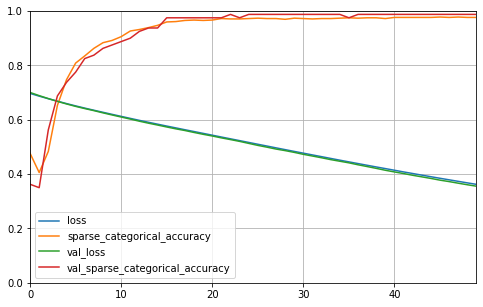

200/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [0]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

print("Testing Accuracy:", model.evaluate(X_test, y_test)[1])

- - -
## 3. IMPLEMENTING YOUR OWN SIMPLE NEURAL NETWORK (60 pts)

Now that you see how the standard library ANN performs on the XOR dataset, you will attempt to implement your own version of the neural network. To help you, a template has been created including the backpropagation. Essensially, you will get the backward gradients for free. However, please note that the backprop implementation assume usage of tanh activation for the hidden layer and softmax for the output layer. There are some subtasks which you need to implement in order to get the network to work properly.

In [0]:
from sklearn.base import BaseEstimator

# careful for keepdims to work or not

# nn_input_dim = 2 # input layer dimensionality
# nn_output_dim = 2 # output layer dimensionality
# nn_hidden_dim = 4 # hiden layer dimensionality
# neural_net = MyNeuralNet(nn_input_dim, nn_hidden_dim, nn_output_dim)
# print(neural_net)

class MyNeuralNet(BaseEstimator):
    """Your implementation of a simple neural network"""

    def __init__ (self, nn_input_dim, nn_hidden_dim, nn_output_dim):
        """
        Initialize the network with random weights
        @param: nn_input_dim: Number of nodes in the input layer
        @param: nn_hidden_dim: Number of nodes in the hidden layer
        @param: nn_output_dim: Number of nodes in the output layer
        """
        # SUBTASK 1 (10 pts): Initialize the parameters to random values.
        np.random.seed(49)
        self.W1 = np.random.rand(nn_input_dim, nn_hidden_dim) #
        self.b1 = np.random.rand(1, nn_hidden_dim) #
        self.W2 = np.random.randn(nn_hidden_dim, nn_output_dim) #
        self.b2 = np.random.randn(1, nn_output_dim) #

        # print(self.W1.shape)
        # print(self.b1.shape)
        # print(self.W2.shape)
        # print(self.b2.shape)

    def loss(self, X, y):
        """
        Evaluate the average loss on the dataset
        """
        # Forward propagation will be needed to calculate the loss
        a1,a2 = self.forward_pass(X)
        # SUBTASK 2 (10 pts): Calculate the loss using log-loss probabilities using a2.
        # You will need to return the average loss on the data 
        # −(𝑦*log(𝑝)+(1−𝑦)*log(1−𝑝))
        m = len(y)
        data_loss = np.sum(-np.log(a2[range(m), y]))/m
        return data_loss

    def softmax(self, data):
      # include theta? or use the sigmoid function
      x = np.exp(data)
      y = x/np.sum(x, axis =1, keepdims=True)
      return y

    def sigmoid(self, x):
      return 1/(1 + np.exp(-x))

    def forward_pass(self, X):
        """
        Pass the signal forward through the layers.
        @param: X: feature
        @return: a1: saved value of the output of the hidden layer
        @return: a2: activated return value of the output layer.
        """
        # print(self.b1.shape)
        # SUBTASK 3 (20 pts): Implement Forward propagation.
        # Note that you must implement tanh activiation for the hidden layer, and softmax for the output layer
        z1 = np.dot(X, self.W1) + self.b1
        a1 = np.tanh(z1)
        z2 = np.dot(a1, self.W2) + self.b2
        a2 = self.softmax(z2)
        return a1, a2 

    def backward_pass(self,a1,a2,X,y):
        """
        Pass the signal back and compute the gradient

        @param: X: feature
        @param: y: label
        @param: a1: saved value of the output of the hidden layer
        @param: a2: activated return value of the output layer.

        @return: dW1: the gradient of W1
        @return: db1: the gradient of b1
        @return: dW2: the gradient of W2
        @return: db2: the gradient of b2
        """
        # You do not have to change this function, ...
        # unless you are advanced and want to use different activation function.
        m = len(y) # number of example
        delta2 = a2 #2,720
        y.astype(np.int64)
        delta2[range(m), y] -= 1
        dW2 = (a1.T).dot(delta2)
        db2 = np.sum(delta2, axis=0, keepdims=True)
        delta1 = delta2.dot(self.W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta1)
        db1 = np.sum(delta1, axis=0)
        return dW1, db1, dW2, db2

    def fit(self, X, y, epochs, X_val, y_val, alpha):
        """
        Learns parameters for the neural network and returns the model.
        
        @param: X: the training feature
        @param: y: the train label
        @param: epochs: Number of passes through the training data for gradient descent
        @param: X_val: the feature of validation set
        @param: y_val: the label of validation set
        """

        # Gradient descent. For each batch...
        for i in range(0, epochs):

            # Forward pass
            a1,a2 = self.forward_pass(X);

            # Backpropagation
            dW1, db1, dW2, db2 = self.backward_pass(a1,a2,X,y)

            # SUBTASK 4 (10 pts): Compute the gradient descent parameter update
            # alpha = 0.01
            self.W1 = self.W1 - alpha*dW1
            self.b1 = self.b1 - alpha*db1
            self.W2 = self.W2 - alpha*dW2
            self.b2 = self.b2 - alpha*db2
        
            # Print the loss and validation accuracy at current epoch.
            if i % 10 == 0:
                print("Epoch %i/%i - loss: %f - accuracy: %f - val_loss: %f - val_acc: %f" 
                      %(i,epochs, self.loss(X_train, y_train), self.evaluate(X_train, y_train),
                        self.loss(X_val, y_val), self.evaluate(X_val,y_val)))

    def evaluate(self, X, y):
        """
        Evaluate the accuracy of the model
        """
        y_pred = self.predict(X)
        return sum(y_pred == y)/len(y)

    def predict(self, X):
        """
        Predict an output

        @param: X: feature
        @return: y_pred: predicted label (0 or 1)
        """
        # SUBTASK 5 (10 pts): Implement the prediction process. 
        # Hint: It should include a forward pass, and then use the class with higher probability.
        a1, a2 = self.forward_pass(X)
        return np.argmax(a2, axis=1)

    def plot_decision_boundary(self, pred_func):
        """
        Plot a decision boundary for visualization purpose.
        If you don't fully understand this function don't worry, it just generates the contour plot below.
        """
        # Set min and max values and give it some padding
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        h = 0.01
        # Generate a grid of points with distance h between them
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        # Predict the function value for the whole gid
        Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        # Plot the contour and training examples
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)


---
## 4. REFLECT ON THE COMPARISON BETWEEN YOUR IMPLEMENTATION TO THE STANDARD LIBRARY (20 pts)
Now that you have implemented your own Neural Net class, let's use it! Create at least 3 instances of your Neural Net class, each with a different number of nodes in the hiden layer, tune it with the appropriate learning rate and number of iteration. You will test their performance in the Xor dataset and report the test accuracy metrics for each instance of your neural network.

Based on the test accuracy, compare your models with the standard library version. How did your own network perform? Is there any major differences between the implementations? Finally, reflecting on your experience implementing a learning algorithm for this assignment (Was it hard/easy/fun?, From which part did you learn the most?).

Epoch 0/400 - loss: 0.779139 - accuracy: 0.486111 - val_loss: 0.691737 - val_acc: 0.587500
Epoch 10/400 - loss: 1.919434 - accuracy: 0.486111 - val_loss: 1.523669 - val_acc: 0.587500
Epoch 20/400 - loss: 2.136062 - accuracy: 0.686111 - val_loss: 1.799034 - val_acc: 0.737500
Epoch 30/400 - loss: 1.897441 - accuracy: 0.665278 - val_loss: 1.553659 - val_acc: 0.737500
Epoch 40/400 - loss: 0.933849 - accuracy: 0.652778 - val_loss: 0.679263 - val_acc: 0.737500
Epoch 50/400 - loss: 0.483311 - accuracy: 0.826389 - val_loss: 0.255082 - val_acc: 0.912500
Epoch 60/400 - loss: 0.080970 - accuracy: 0.968056 - val_loss: 0.058539 - val_acc: 0.962500
Epoch 70/400 - loss: 0.075204 - accuracy: 0.973611 - val_loss: 0.053247 - val_acc: 0.975000
Epoch 80/400 - loss: 0.071846 - accuracy: 0.973611 - val_loss: 0.050052 - val_acc: 0.975000
Epoch 90/400 - loss: 0.069940 - accuracy: 0.977778 - val_loss: 0.048072 - val_acc: 0.975000
Epoch 100/400 - loss: 0.068851 - accuracy: 0.976389 - val_loss: 0.046765 - val_ac

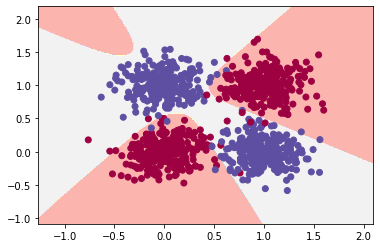

In [0]:
# MODEL 1: Some hyperparameters are provided, but feel free to change them.
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality
nn_hidden_dim = 4 # hiden layer dimensionality
alpha = 0.005 # learning rate for gradient descent
epochs = 400 # number of iteration/epochs
myModel1 = MyNeuralNet(nn_input_dim, nn_hidden_dim, nn_output_dim);
myModel1.fit(X_train, y_train, epochs, X_val, y_val, alpha)
myModel1.plot_decision_boundary(lambda x: myModel1.predict(x))
print("Testing Accuracy:", myModel1.evaluate(X_test, y_test))

Epoch 0/400 - loss: 44.012431 - accuracy: 0.486111 - val_loss: 35.774576 - val_acc: 0.587500
Epoch 10/400 - loss: 5.745018 - accuracy: 0.513889 - val_loss: 7.139896 - val_acc: 0.412500
Epoch 20/400 - loss: 0.901724 - accuracy: 0.716667 - val_loss: 1.266692 - val_acc: 0.687500
Epoch 30/400 - loss: 0.050983 - accuracy: 0.981944 - val_loss: 0.045292 - val_acc: 0.987500
Epoch 40/400 - loss: 0.049871 - accuracy: 0.981944 - val_loss: 0.041081 - val_acc: 0.987500
Epoch 50/400 - loss: 0.049124 - accuracy: 0.981944 - val_loss: 0.038865 - val_acc: 0.987500
Epoch 60/400 - loss: 0.048509 - accuracy: 0.981944 - val_loss: 0.037078 - val_acc: 0.987500
Epoch 70/400 - loss: 0.047983 - accuracy: 0.981944 - val_loss: 0.035565 - val_acc: 0.987500
Epoch 80/400 - loss: 0.047527 - accuracy: 0.981944 - val_loss: 0.034254 - val_acc: 0.987500
Epoch 90/400 - loss: 0.047132 - accuracy: 0.981944 - val_loss: 0.033106 - val_acc: 0.987500
Epoch 100/400 - loss: 0.046788 - accuracy: 0.981944 - val_loss: 0.032094 - val_

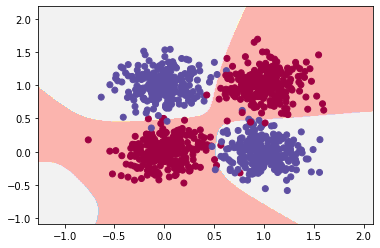

In [0]:
# MODEL 2 here
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality
nn_hidden_dim = 100 # hiden layer dimensionality
alpha = 0.002 # learning rate for gradient descent
epochs = 400 # number of iteration/epochs
myModel1 = MyNeuralNet(nn_input_dim, nn_hidden_dim, nn_output_dim);
myModel1.fit(X_train, y_train, epochs, X_val, y_val, alpha)
myModel1.plot_decision_boundary(lambda x: myModel1.predict(x))
print("Testing Accuracy:", myModel1.evaluate(X_test, y_test))


Epoch 0/400 - loss: 95.671075 - accuracy: 0.486111 - val_loss: 77.751198 - val_acc: 0.587500
Epoch 10/400 - loss: 1.212172 - accuracy: 0.690278 - val_loss: 1.663171 - val_acc: 0.562500
Epoch 20/400 - loss: 3.586186 - accuracy: 0.466667 - val_loss: 4.397938 - val_acc: 0.375000
Epoch 30/400 - loss: 0.053271 - accuracy: 0.977778 - val_loss: 0.068558 - val_acc: 0.975000
Epoch 40/400 - loss: 0.051696 - accuracy: 0.979167 - val_loss: 0.061115 - val_acc: 0.975000
Epoch 50/400 - loss: 0.050616 - accuracy: 0.979167 - val_loss: 0.057530 - val_acc: 0.975000
Epoch 60/400 - loss: 0.049737 - accuracy: 0.979167 - val_loss: 0.054238 - val_acc: 0.975000
Epoch 70/400 - loss: 0.048980 - accuracy: 0.979167 - val_loss: 0.051138 - val_acc: 0.975000
Epoch 80/400 - loss: 0.048311 - accuracy: 0.979167 - val_loss: 0.048213 - val_acc: 0.975000
Epoch 90/400 - loss: 0.047714 - accuracy: 0.980556 - val_loss: 0.045459 - val_acc: 0.975000
Epoch 100/400 - loss: 0.047175 - accuracy: 0.980556 - val_loss: 0.042871 - val_

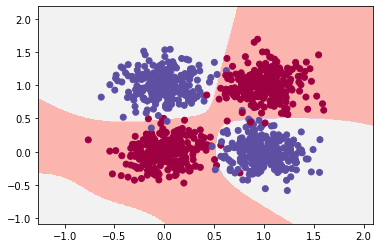

In [0]:
# MODEL 3 here
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality
nn_hidden_dim = 200 # hiden layer dimensionality
alpha = 0.002 # learning rate for gradient descent
epochs = 400 # number of iteration/epochs
myModel1 = MyNeuralNet(nn_input_dim, nn_hidden_dim, nn_output_dim);
myModel1.fit(X_train, y_train, epochs, X_val, y_val, alpha)
myModel1.plot_decision_boundary(lambda x: myModel1.predict(x))
print("Testing Accuracy:", myModel1.evaluate(X_test, y_test))


In [0]:
# COMPARISONS WITH THE STANDARD LIBRARY 
model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=[2]),
    keras.layers.Dense(4, activation="relu"),
    keras.layers.Dense(2, activation="softmax")
])
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
history = model.fit(X_train, y_train, epochs=400,
                    validation_data=(X_val, y_val))

# myModel1.plot_decision_boundary(lambda x: model.predict(x))
print("Testing Accuracy:", model.evaluate(X_test, y_test)[1])

Train on 720 samples, validate on 80 samples
Epoch 1/400
720/720 [==============================] - 1s 785us/sample - loss: 0.8483 - sparse_categorical_accuracy: 0.3833 - val_loss: 0.8243 - val_sparse_categorical_accuracy: 0.2625
Epoch 2/400
720/720 [==============================] - 0s 77us/sample - loss: 0.7729 - sparse_categorical_accuracy: 0.3042 - val_loss: 0.7587 - val_sparse_categorical_accuracy: 0.2625
Epoch 3/400
720/720 [==============================] - 0s 74us/sample - loss: 0.7304 - sparse_categorical_accuracy: 0.3111 - val_loss: 0.7181 - val_sparse_categorical_accuracy: 0.4000
Epoch 4/400
720/720 [==============================] - 0s 77us/sample - loss: 0.7031 - sparse_categorical_accuracy: 0.3819 - val_loss: 0.6917 - val_sparse_categorical_accuracy: 0.4750
Epoch 5/400
720/720 [==============================] - 0s 78us/sample - loss: 0.6839 - sparse_categorical_accuracy: 0.4472 - val_loss: 0.6735 - val_sparse_categorical_accuracy: 0.5125
Epoch 6/400
720/720 [=============

## Reflection


I tested 3 different models all of which were tested using 400 iterations, one with 4 hidden layers and a learning rate of 0.005, another with 100 hidden layers and a learning rate of 0.002, and last one with 200 hidden layers and a learning rate of 0.002, each of which had received testing accuracies of 98%, 98.5%, and 98.5%. Regarding the standard library version with 400 iterations, it received 98.5% for testing accuracy. In terms of the testing accuracies, the two models that I created both with learning rates of 0.002 performed equally the best as the standard library version, all with 98.5% testing accuracy. Based on the implementations, I am sure the standard library versions are built more optimized and efficient, but in the end, I believe that the fundamental steps for implementations are the same. Reflecting my overall experience with this assignment, I thought that it was similar to the implementation of Gradient Descent from Assignment 1. It was a bit hard because I felt some parts didn't fit well together such as when dimensions didn't match and the formulas that we implemented through the slides were not used. Overall though, it was a good learning experience.


---
# Get Help?
In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my [lecture 10](https://docs.google.com/presentation/d/1otQfmMomWctLZKI3hHKAA4lLkbXFtagLaQov8gNh4LI/edit?usp=sharing) and [Colab Notebook 10](https://colab.research.google.com/drive/1x5biI3dP5YvvDEI0wapJcSgQNnATDzNe)
 * Talk to the TA, they are available and there to help you during office hour.
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Assignment 4:...".

Part of the codes used in this assignment is modified from Konstantinos Kitsios under the 3-Clause BSD License. Best of luck and have fun!